In [3]:
import pandas as pd

# Load the data
df = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik.csv")

# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
string_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()


In [5]:
from sklearn.ensemble import IsolationForest

# Function to remove outliers using IsolationForest
def remove_outliers_isof(df):
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df[numeric_cols])
    mask = yhat != -1
    return df[mask].reset_index(drop=True)

# Function to remove outliers using Mean-Std
def remove_outliers_mean_std(df):
    mean_spectra = df[numeric_cols].mean()
    std_spectra = df[numeric_cols].std()
    threshold = 3  # This can be adjusted
    outliers = df[numeric_cols].apply(lambda x: np.abs(x - mean_spectra) > threshold * std_spectra, axis=1).sum(axis=1) > 0
    return df[~outliers].reset_index(drop=True)

# Function to remove outliers using both methods combined
def remove_outliers_combined(df):
    df_mean_std = remove_outliers_mean_std(df)
    df_isof = remove_outliers_isof(df_mean_std)
    return df_isof

# Apply outlier removal methods
df_cleaned_isof = remove_outliers_isof(df)
df_cleaned_mean_std = remove_outliers_mean_std(df)
df_cleaned_combined = remove_outliers_combined(df)


In [13]:
string_cols

['prov_char',
 'country_char',
 'wavenumber',
 'tgp_name',
 'dgp_name',
 'fgp_name',
 'country_name',
 'thnoth_name']

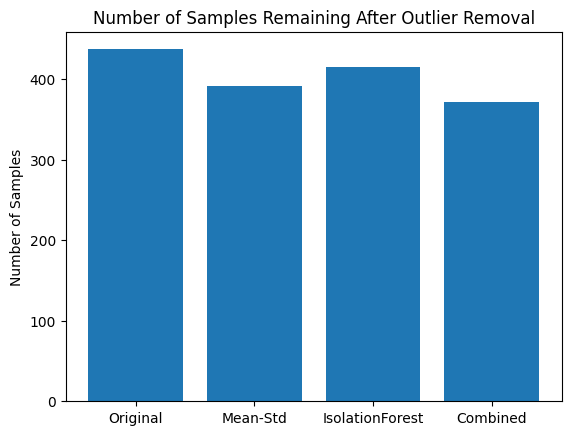

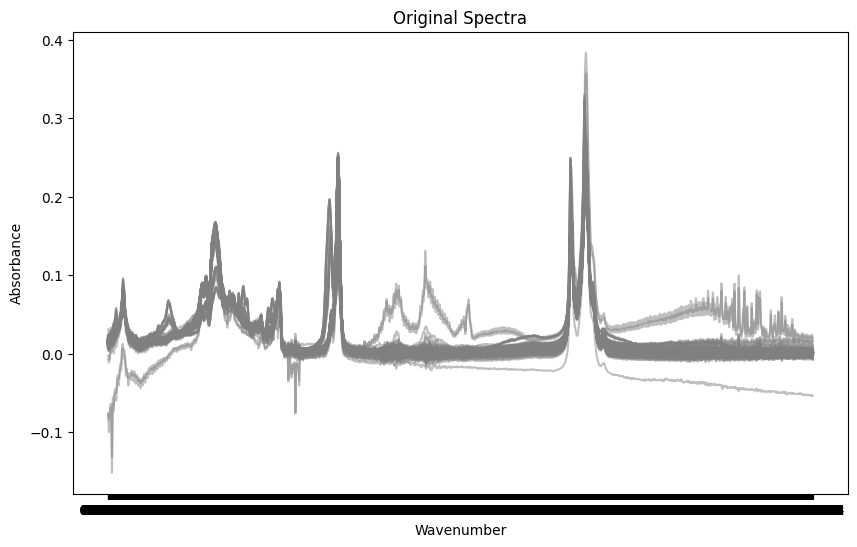

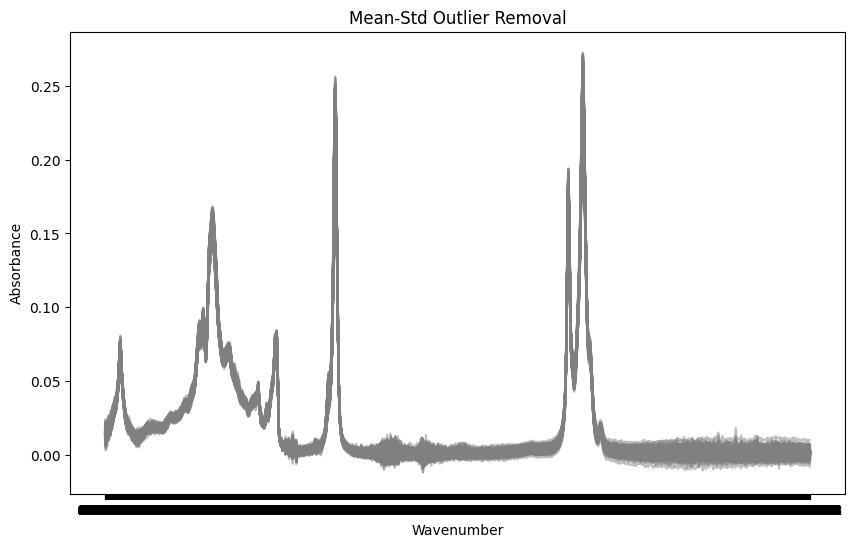

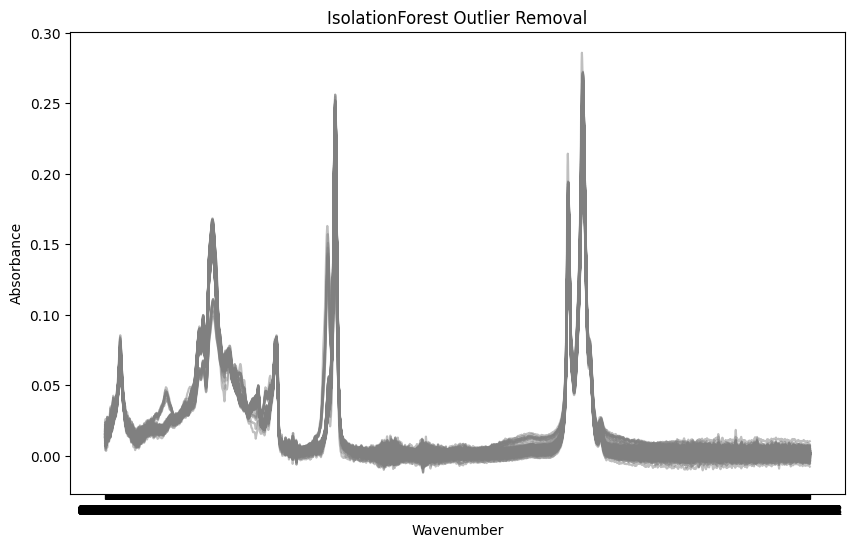

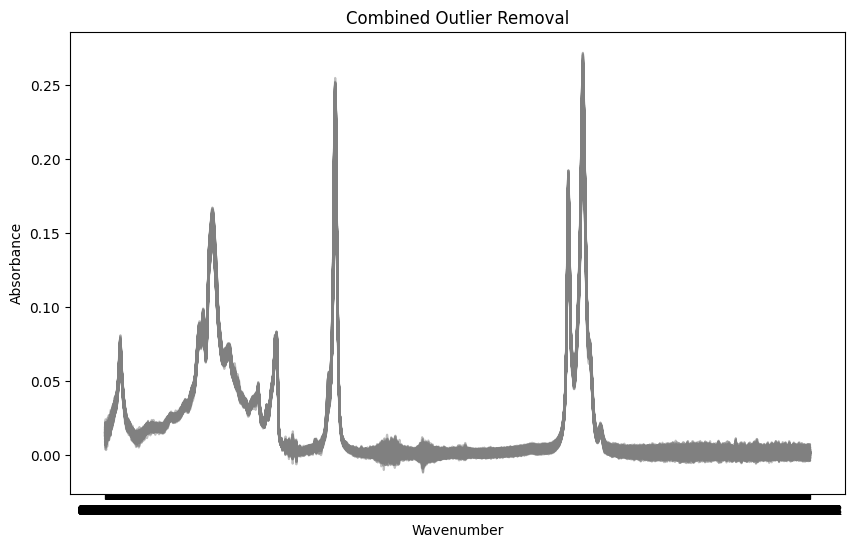

In [6]:
import matplotlib.pyplot as plt

# Number of samples remaining after each outlier removal process
num_samples_original = len(df)
num_samples_mean_std = len(df_cleaned_mean_std)
num_samples_isof = len(df_cleaned_isof)
num_samples_combined = len(df_cleaned_combined)

# Plotting the number of samples remaining
fig, ax = plt.subplots()
methods = ['Original', 'Mean-Std', 'IsolationForest', 'Combined']
num_samples = [num_samples_original, num_samples_mean_std, num_samples_isof, num_samples_combined]
ax.bar(methods, num_samples)
ax.set_ylabel('Number of Samples')
ax.set_title('Number of Samples Remaining After Outlier Removal')

plt.show()

# Plotting spectra
def plot_spectra(df, title):
    plt.figure(figsize=(10, 6))
    for index, row in df.iterrows():
        plt.plot(row[numeric_cols], color='gray', alpha=0.5)
    plt.title(title)
    plt.xlabel('Wavenumber')
    plt.ylabel('Absorbance')
    plt.show()

plot_spectra(df, 'Original Spectra')
plot_spectra(df_cleaned_mean_std, 'Mean-Std Outlier Removal')
plot_spectra(df_cleaned_isof, 'IsolationForest Outlier Removal')
plot_spectra(df_cleaned_combined, 'Combined Outlier Removal')


In [10]:
# Number of samples remaining after each outlier removal process
num_samples_original = len(df)
num_samples_mean_std = len(df_cleaned_mean_std)
num_samples_isof = len(df_cleaned_isof)
num_samples_combined = len(df_cleaned_combined)

In [15]:
# Function to remove spectral regions between specified wavenumbers
def remove_spectral_region(df, start, end):
    columns_to_remove = [col for col in df.columns if start <= float(col) <= end]
    df = df.drop(columns=columns_to_remove)
    return df

# Apply the function to remove the region between 2700 and 1870 cm^-1
df_cleaned = remove_spectral_region(df_cleaned_isof[numeric_cols], 1870, 2700)

In [ ]:
df_cleaned

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = df[numeric_cols]
y = df['thnoth_name']

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=numeric_cols)
important_features = feature_importances.sort_values(ascending=False).head(10)

print("Top 10 Important Features:")
print(important_features)

Top 10 Important Features:
1058.728    0.010643
1186.971    0.009567
1140.206    0.008859
1169.133    0.007791
1170.097    0.007733
1167.205    0.006900
1175.883    0.006643
1152.259    0.006574
1174.436    0.006568
1145.991    0.006429
dtype: float64


In [20]:
# Function to remove outliers using both methods combined
def remove_outliers_combined(df):
    # Remove using Mean-Std
    mean_spectra = df[numeric_cols].mean()
    std_spectra = df[numeric_cols].std()
    threshold = 3
    outliers_mean_std = df[numeric_cols].apply(lambda x: np.abs(x - mean_spectra) > threshold * std_spectra, axis=1).sum(axis=1) > 0
    df_cleaned_mean_std = df[~outliers_mean_std].reset_index(drop=True)
    
    # Remove using Isolation Forest
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_cleaned_mean_std[numeric_cols])
    mask = yhat != -1
    df_cleaned_combined = df_cleaned_mean_std[mask].reset_index(drop=True)
    
    return df_cleaned_combined

# Apply the function
df_cleaned_combined = remove_outliers_combined(df)


C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code

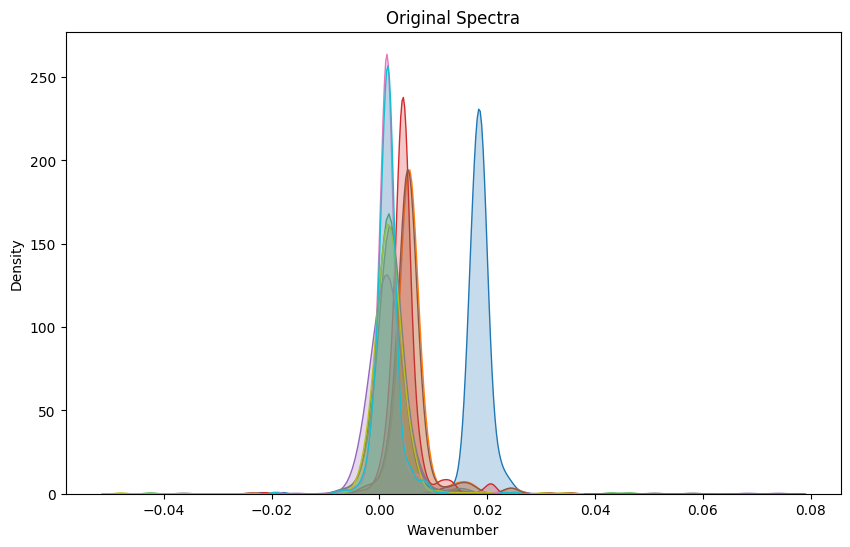

C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code

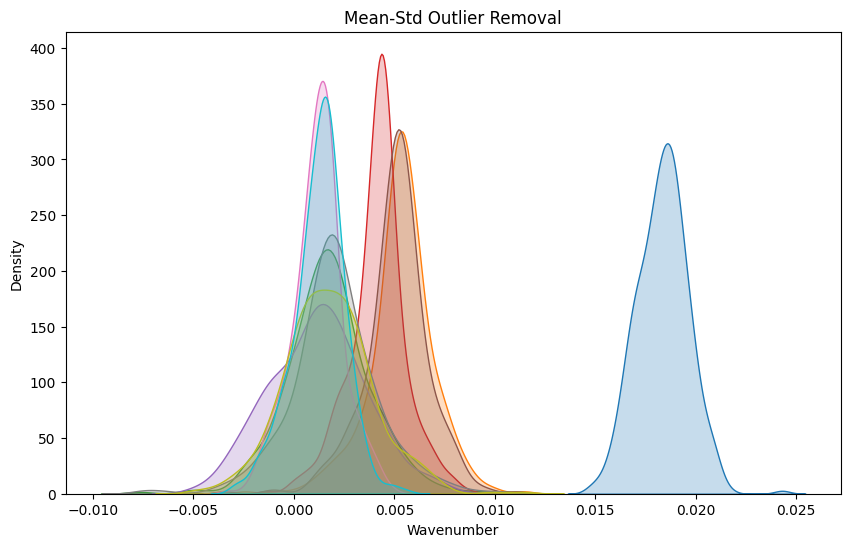

C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code

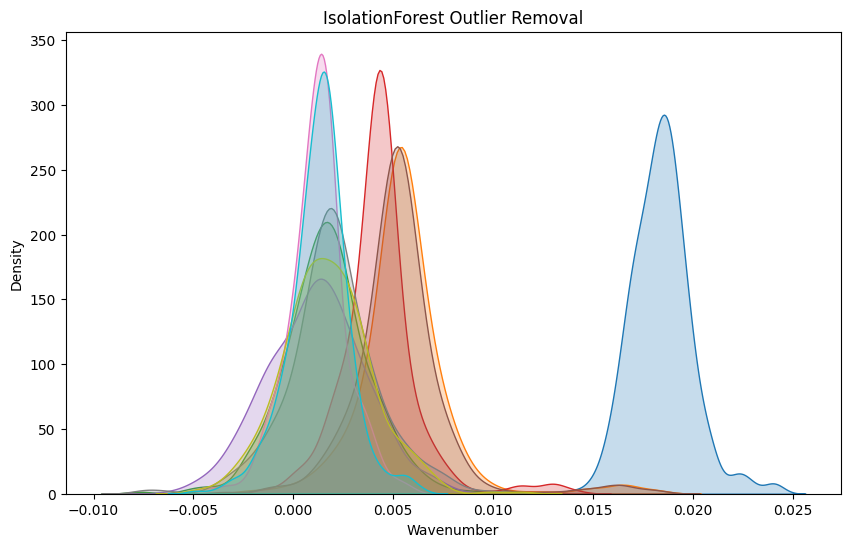

C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_30044\3415159413.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code

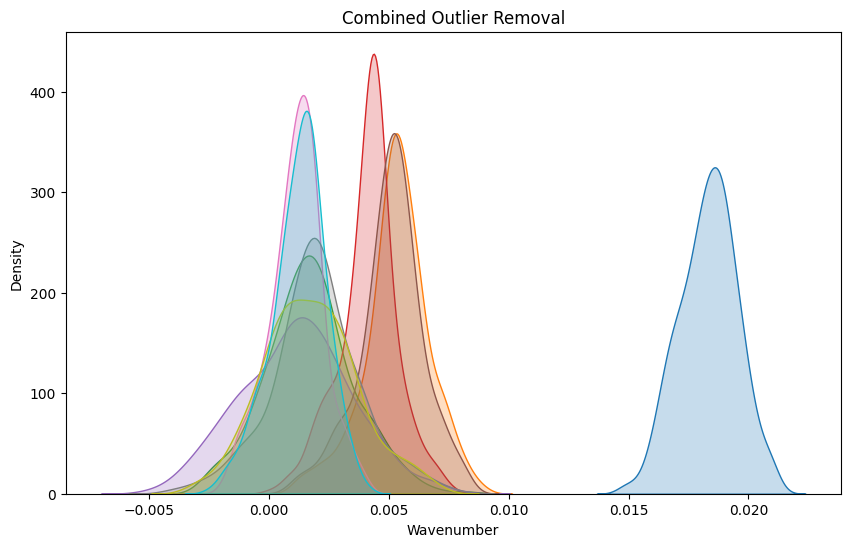

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot density
def plot_density(data, title):
    plt.figure(figsize=(10, 6))
    for col in data.columns:
        sns.kdeplot(data[col], shade=True)
    plt.title(title)
    plt.xlabel('Wavenumber')
    plt.ylabel('Density')
    plt.show()

# Sample a few numeric columns to plot
sampled_numeric_cols = np.random.choice(numeric_cols, size=10, replace=False)

# Plot densities
plot_density(df[sampled_numeric_cols], 'Original Spectra')
plot_density(df_cleaned_mean_std[sampled_numeric_cols], 'Mean-Std Outlier Removal')
plot_density(df_cleaned_isof[sampled_numeric_cols], 'IsolationForest Outlier Removal')
plot_density(df_cleaned_combined[sampled_numeric_cols], 'Combined Outlier Removal')
